In [35]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
# Filtering Dataframe ON United States
DF_US = df[df['job_country'] == 'United States'].copy()

In [36]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']
DF_US = DF_US[(DF_US['job_title_short'].isin(job_titles)) & (DF_US['job_schedule_type'] == 'Full-time') ]
DF_US = DF_US.dropna(subset='salary_year_avg')
job_list = [DF_US[DF_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

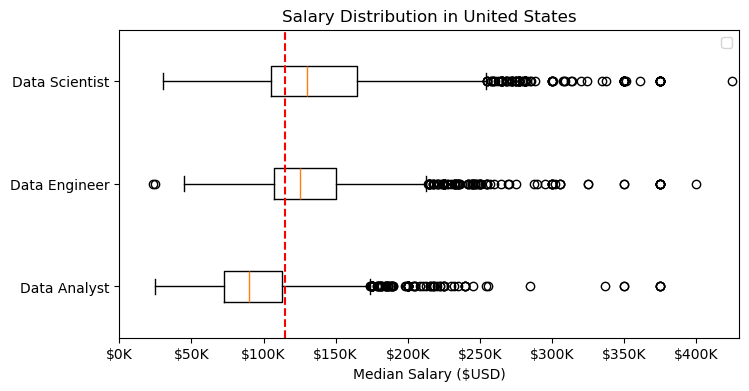

In [37]:
plt.boxplot(job_list,tick_labels=job_titles,vert=False)
ax = plt.gca()
fig = plt.gcf()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f"${int(x/1000)}K"))
ax.set_xlim(0,430000)
ax.axvline(DF_US['salary_year_avg'].median(),color='red',linestyle='--')
ax.legend('')
fig.set_figheight(4)
fig.set_figwidth(8)
plt.xlabel('Median Salary ($USD)')
plt.title('Salary Distribution in United States')
plt.show()